In [10]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
#single data set example
ds=xr.open_dataset('/g/data/oe9/project/team-drip/h30v12_reflectance_2001.nc')
ds

<xarray.Dataset>
Dimensions:          (time: 92, x: 2400, y: 1680)
Coordinates:
  * time             (time) datetime64[ns] 2001-01-01 2001-01-05 2001-01-09 ...
  * x                (x) float64 1.334e+07 1.334e+07 1.334e+07 1.334e+07 ...
  * y                (y) float64 -3.336e+06 -3.336e+06 -3.337e+06 -3.337e+06 ...
Data variables:
    red_630_690      (time, y, x) float32 ...
    nir1_780_900     (time, y, x) float32 ...
    blue_450_520     (time, y, x) float32 ...
    green_530_610    (time, y, x) float32 ...
    nir2_1230_1250   (time, y, x) float32 ...
    swir1_1550_1750  (time, y, x) float32 ...
    swir2_2090_2350  (time, y, x) float32 ...

In [4]:
# create file list
year=range(2001,2018)
fnames=[]
for y in year:
    fnames.append('/g/data/oe9/project/team-drip/h30v12_reflectance_{}.nc'.format(y))
print(fnames)


['/g/data/oe9/project/team-drip/h30v12_reflectance_2001.nc', '/g/data/oe9/project/team-drip/h30v12_reflectance_2002.nc', '/g/data/oe9/project/team-drip/h30v12_reflectance_2003.nc', '/g/data/oe9/project/team-drip/h30v12_reflectance_2004.nc', '/g/data/oe9/project/team-drip/h30v12_reflectance_2005.nc', '/g/data/oe9/project/team-drip/h30v12_reflectance_2006.nc', '/g/data/oe9/project/team-drip/h30v12_reflectance_2007.nc', '/g/data/oe9/project/team-drip/h30v12_reflectance_2008.nc', '/g/data/oe9/project/team-drip/h30v12_reflectance_2009.nc', '/g/data/oe9/project/team-drip/h30v12_reflectance_2010.nc', '/g/data/oe9/project/team-drip/h30v12_reflectance_2011.nc', '/g/data/oe9/project/team-drip/h30v12_reflectance_2012.nc', '/g/data/oe9/project/team-drip/h30v12_reflectance_2013.nc', '/g/data/oe9/project/team-drip/h30v12_reflectance_2014.nc', '/g/data/oe9/project/team-drip/h30v12_reflectance_2015.nc', '/g/data/oe9/project/team-drip/h30v12_reflectance_2016.nc', '/g/data/oe9/project/team-drip/h30v12_r

In [7]:
ds_all=xr.open_mfdataset(fnames)
ds_all

<xarray.Dataset>
Dimensions:          (time: 1564, x: 2400, y: 1680)
Coordinates:
  * x                (x) float64 1.334e+07 1.334e+07 1.334e+07 1.334e+07 ...
  * y                (y) float64 -3.336e+06 -3.336e+06 -3.337e+06 -3.337e+06 ...
  * time             (time) datetime64[ns] 2001-01-01 2001-01-05 2001-01-09 ...
Data variables:
    red_630_690      (time, y, x) float32 dask.array<shape=(1564, 1680, 2400), chunksize=(92, 1680, 2400)>
    nir1_780_900     (time, y, x) float32 dask.array<shape=(1564, 1680, 2400), chunksize=(92, 1680, 2400)>
    blue_450_520     (time, y, x) float32 dask.array<shape=(1564, 1680, 2400), chunksize=(92, 1680, 2400)>
    green_530_610    (time, y, x) float32 dask.array<shape=(1564, 1680, 2400), chunksize=(92, 1680, 2400)>
    nir2_1230_1250   (time, y, x) float32 dask.array<shape=(1564, 1680, 2400), chunksize=(92, 1680, 2400)>
    swir1_1550_1750  (time, y, x) float32 dask.array<shape=(1564, 1680, 2400), chunksize=(92, 1680, 2400)>
    swir2_2090_2350  (

In [32]:
ds_all.nbytes/10**9

176.569389152

In [28]:
# This indicates "no start point, no end point, one pixel per 25" - plenty for example charts
zoom = slice(None, None, 25)
# Select every 25th point of lat and lon, and the 0th (first) time step
ds_lr = ds_all.sel(y=zoom, x=zoom)
ds_lr.nbytes/10**9


0.285888

In [ ]:
%%time
# And now download this subset, since we'll be reusing it - it'll take a minute or so
ds_lr.load()
ds_lr

help needed:

reprojecting modis, don't have osgeo module

is there a way to load subset of data once?\


In [11]:
#rename vars for simple calcs

blue = ds_lr.blue_450_520
green = ds_lr.green_530_610
red = ds_lr.red_630_690
nir1 = ds_lr.nir1_780_900
nir2 = ds_lr.nir2_1230_1250

Text(0.5,1,'h30v12')

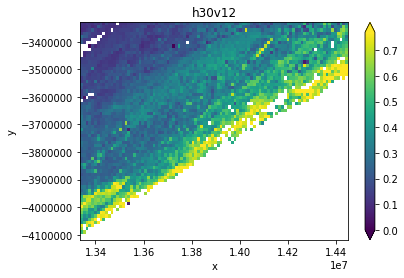

In [20]:
NDVI = (nir1 - red) / (nir1 + red)
NDVI.plot.imshow(robust=True, vmin=0)
plt.title('h30v12')


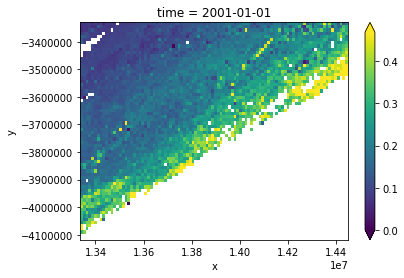

In [13]:
# Using the MODIS-EVI coefficients
L, C1, C2, G = 1, 6, 7.5, 2.5
EVI = G * ((nir1 - red) / (nir1 + C1 * red - C2 * blue + L))
EVI.plot.imshow(robust=True, vmin=0)